In [1]:
import sys,os
os.chdir(os.environ['HOME']+'/Dropbox/jonathanmain/CGM/BHs_lindsey')
sys.path.append(os.environ['HOME']+'/Dropbox//github_repositories/gizmo_analysis/pysrc')

In [2]:
import FIRE_files as ff
from FIRE_files import cosmo
import time, importlib
import pylab as pl, numpy as np, glob, pdb
from numpy import log10 as log
from projectPlotBasics import *
from astropy import units as un, constants as cons

Behroozi+18 not loaded


In [3]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)

In [4]:
ff.pyobjDir

'/Users/jonathanstern/Dropbox/jonathanmain/CGM/rapidCoolingCGM/pyobj/no_yt_analysis/'

In [5]:
importlib.reload(ff)
minMass01Rvir = 57000*100.
ff.Snapshot_profiler.Rcirc2Rvir = 0.1
sim = ff.Simulation('m12i','md','7100',minMass01Rvir=minMass01Rvir)
sim.sfhs(newversion=True)
T_to_Tvir = np.array([10.**prof.thickerShells(prof.profile1D('log_Ts','VW'),5,'VW')[200]/prof.Tvir() for prof in sim.profiles])                    

/Users/jonathanstern/Dropbox//github_repositories/gizmo_analysis/pysrc/FIRE_files.py:1166: RuntimeWarning: divide by zero encountered in log10
  self.sfh['std_log'][it] = (log(self.sfh['sfrs'][inds])).std()
/Users/jonathanstern/opt/anaconda3/envs/for_yt/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [6]:
Mdot_BH = np.load('mdots/Mdotbh_m12i_res7100.npz')
Mdot_CGM = np.load('../rapidCoolingCGM/pyobjs/Mdot_m12i_md_7100.npz')
# t_ratio = np.load('../rapidCoolingCGM/pyobjs/t_cool_to_t_ff_015Rvir_m12i_md_7100.npz')
t_ratio = np.load('../rapidCoolingCGM/pyobjs/t_cool_to_t_ff_m12i_md_7100.npz')
import h5py
jjjc = h5py.File('m12i_z_jjc_jzjc.hdf5')
jjjc_old = np.genfromtxt('medians.csv')

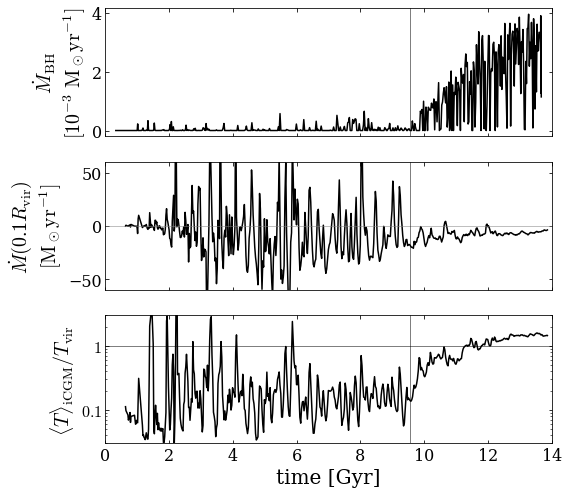

In [13]:
fig = pl.figure(figsize=(8,8))
ff.u.labelsize(True)
for iPanel in range(3):
    ax = pl.subplot(3,1,iPanel+1)
    if iPanel==0:
        pl.plot(Mdot_BH['time'],1000*Mdot_BH['thisMdot'],c='k')
        pl.ylabel(r'$\dot{M}_{\rm BH}$'+'\n'+r'$[10^{-3}\ {\rm M}_\odot {\rm yr}^{-1}]$')
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
    if iPanel==1:
        pl.plot(cosmo.age(Mdot_CGM['zs']),Mdot_CGM['Mdots'],c='k')
        pl.ylabel(r'$\dot{M}(0.1 R_{\rm vir})$'+'\n'+r'$[{\rm M}_\odot {\rm yr}^{-1}]$')
        pl.axhline(0.,c='.5',ls='-',lw=0.5)
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        pl.ylim(-60,60)
        ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
    if iPanel==2:
        pl.plot(cosmo.age(sim.zs()),T_to_Tvir,c='k')
        pl.semilogy()
        pl.xlabel(r'time [Gyr]')
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        pl.ylim(0.03,3)
        pl.ylabel(r'$\langle T\rangle_{\rm iCGM} / T_{\rm vir}$')
        pl.axhline(1.,c='k',ls='-',lw=0.5)
    pl.axvline(9.55,c='k',ls='-',lw=0.5)
    pl.xlim(0,14)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
pl.savefig('EAS.pdf',bbox_inches='tight')

# SFIR talk

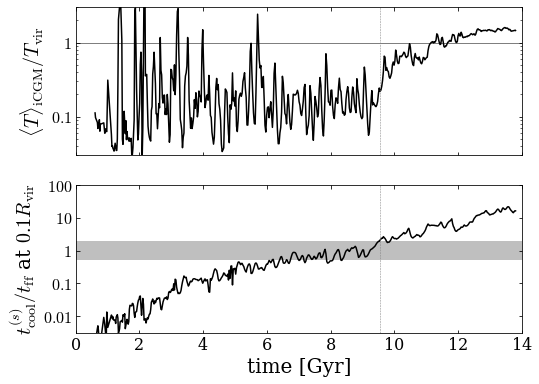

In [5]:
fig = pl.figure(figsize=(8,6))
ff.u.labelsize(True)
for iPanel in range(2):
    ax = pl.subplot(2,1,iPanel+1)
    if iPanel==0:
        pl.plot(cosmo.age(sim.zs()),T_to_Tvir,c='k')
        pl.semilogy()
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        pl.ylim(0.03,3)
        pl.ylabel(r'$\langle T\rangle_{\rm iCGM} / T_{\rm vir}$')
        pl.axhline(1.,c='k',ls='-',lw=0.5)
    if iPanel==1:
        pl.plot(cosmo.age(t_ratio['zs']),10.**t_ratio['log_t_cool_to_t_ff'],c='k')
        pl.fill_between([0,15],0.5,2,facecolor='.5',alpha=0.5)
        pl.semilogy()
        pl.xlabel(r'time [Gyr]')
        pl.ylabel(r'$t^{(s)}_{\rm cool} / t_{\rm ff}$ at $0.1 R_{\rm vir}$')
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        pl.ylim(0.003,100)        
        pl.xlabel(r'time [Gyr]')
        ax.yaxis.set_major_locator(ticker.LogLocator(numdecs=10,numticks=10))
    pl.axvline(9.55,c='.5',ls='--',lw=0.5)
    pl.xlim(0,14)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
pl.savefig('EAS_2.pdf',bbox_inches='tight')

# BSF proposal

### calculate j/j_c from Alex's datacube

In [7]:
import h5py, scipy.interpolate

ag_data_path = "./"
ag_df = h5py.File(ag_data_path + 'anna_datacube.hdf5','r')
ag_run_name = 'm12i_res7100'
ag_data = ag_df[ag_run_name]

jc_star_history = ag_data['jc_star_history']
snapnums = ag_data['snapnums']
snapshot_times = ag_data['snapshot_times']
rvirs = ag_data['rvirs']

star_j_r_eps_h = jc_star_history['star_j_r_eps_h']
star_jc_age_edges = jc_star_history['star_jc_age_edges']
star_jc_eps_edges = jc_star_history['star_jc_eps_edges']
star_jc_redges = jc_star_history['star_jc_redges']

snapshot_times_max = snapshot_times[:].max()
snapshot_times_lbt = snapshot_times_max-snapshot_times[:]

star_jc_eps_edges_center = 0.5 * (star_jc_eps_edges[529,:-1]+star_jc_eps_edges[529,1:])

circ_median = np.zeros(snapshot_times_lbt.shape[0])
circ_1sig_low = np.zeros(snapshot_times_lbt.shape[0])
circ_1sig_high = np.zeros(snapshot_times_lbt.shape[0])

for ii in range(0,snapshot_times_lbt.shape[0]):
    circ_dist = np.sum( (np.sum( star_j_r_eps_h[ii,1,:,:,:] , axis = 0))[:,0:5] , axis = 1)
    circ_dist_cumsum = np.cumsum(circ_dist)
    interp = scipy.interpolate.interp1d( circ_dist_cumsum/circ_dist_cumsum.max(), star_jc_eps_edges_center)
    circ_median[ii] = interp(0.5)
    circ_1sig_low[ii] = interp(0.5-0.341)
    circ_1sig_high[ii] = interp(0.5+0.341)

non_nan_flag = ~np.isnan(circ_median)


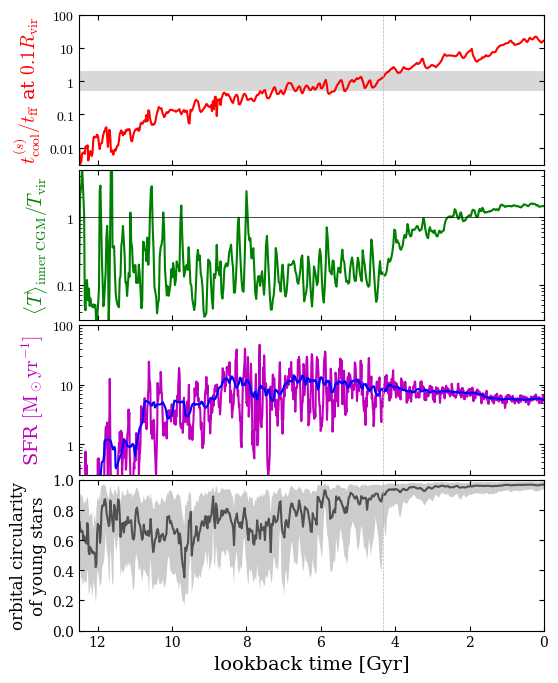

In [8]:
fig = pl.figure(figsize=(6,8));pl.subplots_adjust(hspace=0.03)
ff.u.labelsize(False)
for iPanel in range(4):
    ax = pl.subplot(4,1,iPanel+1)
    if iPanel==0:
        pl.plot(cosmo.age(0)-cosmo.age(t_ratio['zs']),10.**t_ratio['log_t_cool_to_t_ff'],c='r')
        pl.fill_between([0,15],0.5,2,facecolor='.7',alpha=0.5)
        pl.semilogy()
        pl.ylabel(r'$t^{(s)}_{\rm cool} / t_{\rm ff}$ at $0.1 R_{\rm vir}$',color='r')
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        pl.ylim(0.003,100)        
        ax.yaxis.set_major_locator(ticker.LogLocator(numdecs=10,numticks=10))
    if iPanel==1:
        pl.plot(cosmo.age(0)-cosmo.age(sim.zs()),T_to_Tvir,c='g')
        pl.semilogy()
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        pl.ylim(0.03,5)
        pl.ylabel(r'$\langle T\rangle_{\rm inner\ CGM} / T_{\rm vir}$',color='g')
        pl.axhline(1.,c='k',ls='-',lw=0.5)
    if iPanel==2:
        pl.plot(cosmo.age(0)-cosmo.age(sim.sfh['zs']),sim.sfh['sfrs'],c='m')
        pl.plot(cosmo.age(0)-cosmo.age(sim.sfh['zs']),sim.sfh['means'],c='b')
        pl.semilogy()
        pl.ylabel(r'SFR $[{\rm M}_\odot{\rm yr}^{-1}]$',color='m')
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        pl.ylim(0.3,100)        
    if iPanel==3:
#         pl.plot(cosmo.age(0)-cosmo.age(jjjc['z'][:]),jjjc['jjc_median'][:],c='k')
        pl.plot(snapshot_times_lbt[non_nan_flag], circ_median[non_nan_flag], c='black', linestyle = '-', alpha = 0.6 )
        pl.fill_between(snapshot_times_lbt[non_nan_flag], circ_1sig_low[non_nan_flag], \
               circ_1sig_high[non_nan_flag], facecolor = 'gray', alpha = 0.4, edgecolor = 'none')
#         pl.plot(jjjc_old[:,0],jjjc_old[:,1],c='b')
        pl.xlabel(r'lookback time [Gyr]')
        pl.ylabel('orbital circularity\nof young stars',fontsize=12)
        pl.ylim(0,1)
    pl.axvline(cosmo.age(0).value-9.55,c='.7',ls='--',lw=0.5)
    pl.xlim(12.5,0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
pl.savefig('BSF.pdf',bbox_inches='tight')

# ERC

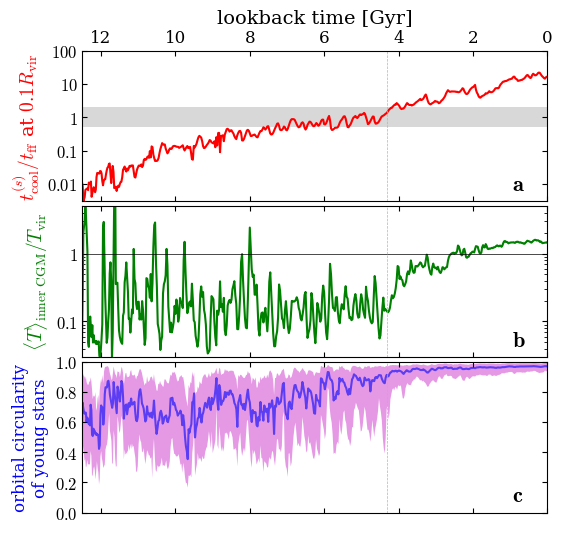

In [32]:
fig = pl.figure(figsize=(6,6));pl.subplots_adjust(hspace=0.03)
ff.u.labelsize(False)
for iPanel in range(3):
    ax = pl.subplot(3,1,iPanel+1)
    if iPanel==0:
        pl.plot(cosmo.age(0)-cosmo.age(t_ratio['zs']),10.**t_ratio['log_t_cool_to_t_ff'],c='r')
        pl.fill_between([0,15],0.5,2,facecolor='.7',alpha=0.5)
        pl.semilogy()
        pl.ylabel(r'$t^{(s)}_{\rm cool} / t_{\rm ff}$ at $0.1 R_{\rm vir}$',color='r')
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(2))            
        pl.ylim(0.003,100)        
        ax.yaxis.set_major_locator(ticker.LogLocator(numdecs=10,numticks=10))
        ax.xaxis.set_label_position('top')
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_ticks_position('both')
        pl.xlabel(r'lookback time [Gyr]')
    if iPanel==1:
        pl.plot(cosmo.age(0)-cosmo.age(sim.zs()),T_to_Tvir,c='g')
        pl.semilogy()
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        ax.yaxis.set_major_formatter(ff.u.arilogformatter)
        pl.ylim(0.03,5)
        pl.ylabel(r'$\langle T\rangle_{\rm inner\ CGM} / T_{\rm vir}$',color='g')
        pl.axhline(1.,c='k',ls='-',lw=0.5)
    if iPanel==2:
        pl.plot(snapshot_times_lbt[non_nan_flag], circ_median[non_nan_flag], c='b', linestyle = '-', alpha = 0.6 )
        pl.fill_between(snapshot_times_lbt[non_nan_flag], circ_1sig_low[non_nan_flag], \
               circ_1sig_high[non_nan_flag], facecolor = 'm', alpha = 0.4, edgecolor = 'none')
#         pl.plot(jjjc_old[:,0],jjjc_old[:,1],c='b')        
        pl.ylabel('orbital circularity\nof young stars',fontsize=12,color='b')
        pl.ylim(0,1)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: r'$%.1f$'%x))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: r'$%d$'%x))
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
    pl.axvline(cosmo.age(0).value-9.55,c='.7',ls='--',lw=0.5)
    pl.xlim(12.5,0)    
    ax.tick_params(axis='both',labelsize=12)
    pl.text(0.925,0.075,r'$\bf{%c}$'%('abc'[iPanel]),fontsize=16,transform=ax.transAxes)
pl.savefig('/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/ipynb/ERC/transition.pdf',bbox_inches='tight')

In [66]:
sim.sfh.keys()

dict_keys(['sfrs', 'zs', 'means', 'std', 'std_log'])

In [57]:
ff.iSnapshot(0.18)

495

In [72]:
cosmo.age(0)-cosmo.age(ff.z_from_iSnapshot(516))

<Quantity 1.72731144 Gyr>

<Quantity 2.2268454 Gyr>

In [35]:
cosmo.age(0)-cosmo.age(0.92),cosmo.age(0)-cosmo.age(0.3)

(<Quantity 7.49847679 Gyr>, <Quantity 3.43994112 Gyr>)

In [27]:
jjjc_old[:5]

array([[12.47046,  0.68648],
       [12.46823,  0.67787],
       [12.466  ,  0.67025],
       [12.46314,  0.66187],
       [12.44362,  0.65307]])